In [1]:
import pandas as pd
df = pd.read_csv('final_df.csv')

In [2]:
df

,id,company,positionName_x,description,salary,location,rating,reviewsCount,postedAt,externalApplyLink,url,All,JobID,positionName_y,KNN,TF-IDF,CV,Final
0,1336f2ba99b7aa51,Emerson,Data Science Engineer,Responsibilities Development of Data Analys...,NaN,"Pune, Maharashtra",3.8,2888.0,2 days ago,https://in.indeed.com/applystart?jk=1336f2ba99...,https://www.indeed.co.in/rc/clk?jk=1336f2ba99b...,"1336f2ba99b7aa51,Emerson,Data Science Engineer...",33,Data Science Engineer,0.037676,0.038526,0.081524,0.157726
1,d6a9445dca6529ca,Revolo InfoTech,Machine Learning Engineer,We are seeking a highly skilled ML Ops Enginee...,"₹15,00,000 - ₹24,00,000 a year","Mumbai, Maharashtra",NaN,NaN,2 days ago,NaN,https://www.indeed.co.in/company/Revolo-Infote...,"d6a9445dca6529ca,Revolo InfoTech,Machine Learn...",54,Machine Learning Engineer,0.214047,0.215996,0.120360,0.550404
2,8099c00f755726f3,Token Metrics,Data Scientist (India Remote),Token Metrics is searching for a highly capabl...,NaN,"Bengaluru, Karnataka",NaN,NaN,1 day ago,NaN,https://www.indeed.co.in/rc/clk?jk=8099c00f755...,"8099c00f755726f3,Token Metrics,Data Scientist ...",74,Data Scientist (India Remote),0.133341,0.135376,0.320617,0.589334
3,23291deee438b2dc,Analog and Digital Labs India Pvt,Machine Learning Developer,Greetings From Analog & Digital Labs India Pvt...,"₹3,00,000 - ₹5,00,000 a year","Coimbatore, Tamil Nadu",NaN,NaN,3 days ago,NaN,https://www.indeed.co.in/company/Analog-and-Di...,"23291deee438b2dc,Analog and Digital Labs India...",78,Machine Learning Developer,0.029908,0.030601,0.062694,0.123203
4,a388c042d99345d2,Chubb INA Holdings Inc.,Data Scientist,Job Requirements Responsibilities Work with b...,NaN,"Bengaluru, Karnataka",3.7,1045.0,4 days ago,https://in.indeed.com/applystart?jk=a388c042d9...,https://www.indeed.co.in/rc/clk?jk=a388c042d99...,"a388c042d99345d2,Chubb INA Holdings Inc.,Data ...",91,Data Scientist,0.333333,0.333333,0.183206,0.849873
5,5f449b74d67e072d,Chubb INA Holdings Inc.,Data Science - Knowledge Graph,Work Experience Work with business partners gl...,NaN,"Bengaluru, Karnataka",3.7,1045.0,4 days ago,https://in.indeed.com/applystart?jk=5f449b74d6...,https://www.indeed.co.in/rc/clk?jk=5f449b74d67...,"5f449b74d67e072d,Chubb INA Holdings Inc.,Data ...",95,Data Science - Knowledge Graph,0.324164,0.324391,0.177472,0.826027
6,7abc93fb606577de,Pridetech labs pvt ltd Bangalore,Data Scientist,Qualifications for Senior Data Scientist MS in...,"From ₹5,00,000 a year",Remote,NaN,NaN,5 days ago,NaN,https://www.indeed.co.in/company/Pridetech-lab...,"7abc93fb606577de,Pridetech labs pvt ltd Bangal...",140,Data Scientist,0.067500,0.068870,0.118448,0.254817
7,0411db7f75aa4a13,Payas Technologies Pvt Ltd,Python Data Science Trainer,We are hiring for an expert Python Data Scienc...,"₹30,000 a month","Pune, Maharashtra",NaN,NaN,5 days ago,NaN,https://www.indeed.co.in/company/Payas-Technol...,"0411db7f75aa4a13,Payas Technologies Pvt Ltd,Py...",164,Python Data Science Trainer,0.130479,0.132499,0.110678,0.373656
8,c12e50690eed7838,Simplifai India,Senior Data Scientist,Simplifai is a Global IT company specializing ...,NaN,"Pune, Maharashtra",NaN,NaN,10 days ago,https://in.indeed.com/applystart?jk=c12e50690e...,https://www.indeed.co.in/rc/clk?jk=c12e50690ee...,"c12e50690eed7838,Simplifai India,Senior Data S...",183,Senior Data Scientist,0.191957,0.194028,0.157269,0.543254
9,464f8855716a27dc,CogniveAI Innovations,Machine Learning Engineer,No. of. Openings : 4 Years of Experience : ...,NaN,"Chennai, Tamil Nadu",NaN,NaN,11 days ago,https://in.indeed.com/applystart?jk=464f885571...,https://www.indeed.co.in/rc/clk?jk=464f8855716...,"464f8855716a27dc,CogniveAI Innovations,Machine...",199,Machine Learning Engineer,0.027520,0.028162,0.018370,0.074052


In [ ]:
df3 = df.copy()
        # st.dataframe(df3)
# df3.fillna("Hong Kong", inplace=True)

In [6]:
rec_loc = df3.location.value_counts()

In [7]:
rec_loc

Bengaluru, Karnataka      27
Pune, Maharashtra          6
Chennai, Tamil Nadu        5
Mumbai, Maharashtra        4
Hyderabad, Telangana       4
Remote                     2
India                      2
Noida, Uttar Pradesh       2
Coimbatore, Tamil Nadu     1
Ahmedabad, Gujarat         1
Bhubaneshwar, Orissa       1
Madurai, Tamil Nadu        1
Name: location, dtype: int64

In [8]:
df3.shape

(56, 18)

In [10]:
locations_df = pd.DataFrame(rec_loc)
locations_df

,location
"Bengaluru, Karnataka",27
"Pune, Maharashtra",6
"Chennai, Tamil Nadu",5
"Mumbai, Maharashtra",4
"Hyderabad, Telangana",4
Remote,2
India,2
"Noida, Uttar Pradesh",2
"Coimbatore, Tamil Nadu",1
"Ahmedabad, Gujarat",1


In [11]:
locations_df.reset_index(inplace=True)

In [12]:
locations_df

,index,location
0,"Bengaluru, Karnataka",27
1,"Pune, Maharashtra",6
2,"Chennai, Tamil Nadu",5
3,"Mumbai, Maharashtra",4
4,"Hyderabad, Telangana",4
5,Remote,2
6,India,2
7,"Noida, Uttar Pradesh",2
8,"Coimbatore, Tamil Nadu",1
9,"Ahmedabad, Gujarat",1


In [13]:
locations_df['index'] = locations_df['index'].apply(lambda x: x.replace("Area", "") if "Area" in x else x)


In [14]:
locations_df

,index,location
0,"Bengaluru, Karnataka",27
1,"Pune, Maharashtra",6
2,"Chennai, Tamil Nadu",5
3,"Mumbai, Maharashtra",4
4,"Hyderabad, Telangana",4
5,Remote,2
6,India,2
7,"Noida, Uttar Pradesh",2
8,"Coimbatore, Tamil Nadu",1
9,"Ahmedabad, Gujarat",1


In [19]:
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import folium
from folium.plugins import FastMarkerCluster
from streamlit_folium import folium_static
import folium
from geopy.extra.rate_limiter import RateLimiter
import numpy as np
from streamlit_folium import folium_static

In [20]:
locator = Nominatim(user_agent="myGeocoder")

In [21]:
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

In [22]:
locations_df['loc_geo'] = locations_df['index'].apply(geocode)

2023-02-22 10:55:03.848 WARNING urllib3.connectionpool: Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)")': /search?q=Pune%2C+Maharashtra&format=json&limit=1


In [23]:
locations_df['point'] = locations_df['loc_geo'].apply(lambda loc: tuple(loc.point) if loc else None)

In [24]:
locations_df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(locations_df['point'].tolist(), index=locations_df.index)

In [25]:
locations_df

,index,location,loc_geo,point,latitude,longitude,altitude
0,"Bengaluru, Karnataka",27,"(Bengaluru, Bangalore North, Bangalore Urban, ...","(12.9767936, 77.590082, 0.0)",12.976794,77.590082,0.0
1,"Pune, Maharashtra",6,"(Pune City, Pune, Maharashtra, India, (18.5214...","(18.521428, 73.8544541, 0.0)",18.521428,73.854454,0.0
2,"Chennai, Tamil Nadu",5,"(CPI(M), COMMUNIST PARTY OF INDIA (MARXIST), S...","(13.035944350000001, 80.24099949725411, 0.0)",13.035944,80.240999,0.0
3,"Mumbai, Maharashtra",4,"(Mumbai, Mumbai Suburban, Maharashtra, India, ...","(19.0785451, 72.878176, 0.0)",19.078545,72.878176,0.0
4,"Hyderabad, Telangana",4,"(Hyderabad, Telangana, India, (17.38878595, 78...","(17.38878595, 78.46106473453146, 0.0)",17.388786,78.461065,0.0
5,Remote,2,"(Remote, Coos County, Oregon, United States, (...","(43.0059455, -123.8925908, 0.0)",43.005946,-123.892591,0.0
6,India,2,"(India, (22.3511148, 78.6677428))","(22.3511148, 78.6677428, 0.0)",22.351115,78.667743,0.0
7,"Noida, Uttar Pradesh",2,"(Retain user, D 242, Sector 63 Noida, Uttar Pr...","(28.629230200000002, 77.38416795, 0.0)",28.629230,77.384168,0.0
8,"Coimbatore, Tamil Nadu",1,"(Leo Packers and Movers Coimbatore, 1/438 Avin...","(11.0600516, 77.0679581, 0.0)",11.060052,77.067958,0.0
9,"Ahmedabad, Gujarat",1,"(Ahmedabad, Ahmedabad City Taluka, Ahmedabad D...","(23.0216238, 72.5797068, 0.0)",23.021624,72.579707,0.0


In [26]:
locations_df.dropna(subset=['latitude'], inplace=True)
locations_df.dropna(subset=['longitude'], inplace=True)

In [27]:
#Set start location for map
folium_map = folium.Map(location=[22.3186,114.1850],
                        zoom_start=11,
                        tiles= "cartodbdark_matter")


In [28]:
#Adding points to map
for lat, lon, ind, job_no in zip(locations_df['latitude'], locations_df['longitude'], locations_df['index'], locations_df['location']):
    label = folium.Popup("Area: " + ind + "<br> Number of Jobs: " + str(job_no), max_width=500)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        fill = True,
        color='cadetblue',
        fill_col = "lightblue",
        icon_size = (150,150),
        ).add_to(folium_map)

In [30]:
available_locations = df3.location.value_counts().sum()
all_locations = df3.location.value_counts().sum() + df3.location.isnull().sum()
# st.write("**JOB LOCATIONS FROM**", available_locations, "**OF**", all_locations, "**JOBS**")

In [32]:
folium_static(folium_map, width=1250)

2023-02-22 10:57:38.248 
  command:

    streamlit run c:\Users\raksh\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [47]:
final_salary = df.copy()



In [48]:
final_salary["salary"].dropna()

1     ₹15,00,000 - ₹24,00,000 a year
3       ₹3,00,000 - ₹5,00,000 a year
6              From ₹5,00,000 a year
7                    ₹30,000 a month
19         ₹25,000 - ₹35,000 a month
21            Up to ₹8,00,000 a year
22      ₹4,00,000 - ₹8,00,000 a year
28      ₹5,00,000 - ₹7,00,000 a year
29           Up to ₹37,00,000 a year
30             Up to ₹20,000 a month
31                    ₹2,500 a month
36    ₹15,00,000 - ₹24,00,000 a year
48            Up to ₹8,00,000 a year
Name: salary, dtype: object

In [49]:
col=final_salary["salary"].dropna().to_list()
col

['₹15,00,000 - ₹24,00,000 a year',
 '₹3,00,000 - ₹5,00,000 a year',
 'From ₹5,00,000 a year',
 '₹30,000 a month',
 '₹25,000 - ₹35,000 a month',
 'Up to ₹8,00,000 a year',
 '₹4,00,000 - ₹8,00,000 a year',
 '₹5,00,000 - ₹7,00,000 a year',
 'Up to ₹37,00,000 a year',
 'Up to ₹20,000 a month',
 '₹2,500 a month',
 '₹15,00,000 - ₹24,00,000 a year',
 'Up to ₹8,00,000 a year']

In [50]:
y=[]
m=[]
for i in col:
    if i.endswith('year'):
        y.append(i)
    else:
        m.append(i)
        



In [51]:
yearly_salary=pd.DataFrame(y)
yearly_salary

,0
0,"₹15,00,000 - ₹24,00,000 a year"
1,"₹3,00,000 - ₹5,00,000 a year"
2,"From ₹5,00,000 a year"
3,"Up to ₹8,00,000 a year"
4,"₹4,00,000 - ₹8,00,000 a year"
5,"₹5,00,000 - ₹7,00,000 a year"
6,"Up to ₹37,00,000 a year"
7,"₹15,00,000 - ₹24,00,000 a year"
8,"Up to ₹8,00,000 a year"


In [52]:
monthly_salary=pd.DataFrame(m)
monthly_salary

,0
0,"₹30,000 a month"
1,"₹25,000 - ₹35,000 a month"
2,"Up to ₹20,000 a month"
3,"₹2,500 a month"


In [53]:
import re

In [54]:
monthly_salary_range = []
for i in m:
    x = re.findall('[0-9,]+', str(i))
    for j in x:
        monthly_salary_range.append(int(j.replace(",",'')))
        monthly_salary_range = [i for i in monthly_salary_range if i != 0]
        monthly_salary_range = sorted(monthly_salary_range)

In [55]:
monthly_salary_to_yearly = []
for i in monthly_salary_range:
    monthly_salary_to_yearly.append(i*12)

In [56]:
monthly_salary_range

[2500, 20000, 25000, 30000, 35000]

In [57]:
monthly_salary_to_yearly

[30000, 240000, 300000, 360000, 420000]

In [58]:
yearly_salary_range = []
for i in y:
    x = re.findall('[0-9,]+', str(i))
    for j in x:
        yearly_salary_range.append(int(j.replace(",",'')))
        yearly_salary_range = [i for i in yearly_salary_range if i != 0]
        yearly_salary_range = sorted(yearly_salary_range)

In [83]:
final_salary=yearly_salar/y_range+monthly_salary_to_yearly

NameError: name 'yearly_salar' is not defined

In [82]:
final_salary=pd.DataFrame(final_salary,columns=["final_salary"])
final_salary

,final_salary
0,300000
1,400000
2,500000
3,500000
4,500000
5,700000
6,800000
7,800000
8,800000
9,1500000


In [76]:
def salary_converter(list_conv):
    salary_range = []
    for i in list_conv:
        x = re.findall('[0-9,]+', str(i))
        for j in x:
            salary_range.append(int(j.replace(",",'')))
            salary_range = [i for i in salary_range if i != 0]
            salary_range = sorted(salary_range)
    return salary_range



def get_monthly_yearly_salary(col):
        y=[]
        m=[]
        for i in col:
            if i.endswith('year'):
                y.append(i)
            else:
                m.append(i)
        return y,m

In [77]:
final_salary = df.copy()

In [78]:
final_salary = df.copy()
col=final_salary["salary"].dropna().to_list()
y,m=get_monthly_yearly_salary(col)
early_salary_range=salary_converter(y)
monthly_salary_to_yearly=salary_converter(m)
final_salary=yearly_salary_range+monthly_salary_to_yearly
salary_df=pd.DataFrame(final_salary,columns=['Salary Range'])
sal_count = salary_df['Salary Range'].count() 




In [75]:
monthly_salary_to_yearly

In [ ]:
st.write(" **SALARY RANGE FROM**", sal_count, "**SALARY VALUES PROVIDED**")


fig2 = px.box(salary_df, y= "Salary Range", width=500)
fig2.update_yaxes(showticklabels=True, )
fig2.update_xaxes(visible=True, showticklabels=True)
# st.write(fig2)
st.plotly_chart(fig2, use_container_width=True)
        

In [ ]:
        salary_range = []
                for i in final_salary['salary']:
                    x = re.findall('[0-9,]+', str(i))
                    for j in x:
                        salary_range.append(int(j.replace(",",'')))
                        salary_range = [i for i in salary_range if i != 0]
                        salary_range = sorted(salary_range)
                
                salary_df = pd.DataFrame(salary_range, columns=['Salary Range'])
                
                sal_count = salary_df['Salary Range'].count() 
                
                st.write(" **SALARY RANGE FROM**", sal_count, "**SALARY VALUES PROVIDED**")
                
        
                fig2 = px.box(salary_df, y= "Salary Range", width=500)
                fig2.update_yaxes(showticklabels=True, )
                fig2.update_xaxes(visible=True, showticklabels=True)
                # st.write(fig2)
                st.plotly_chart(fig2, use_container_width=True)

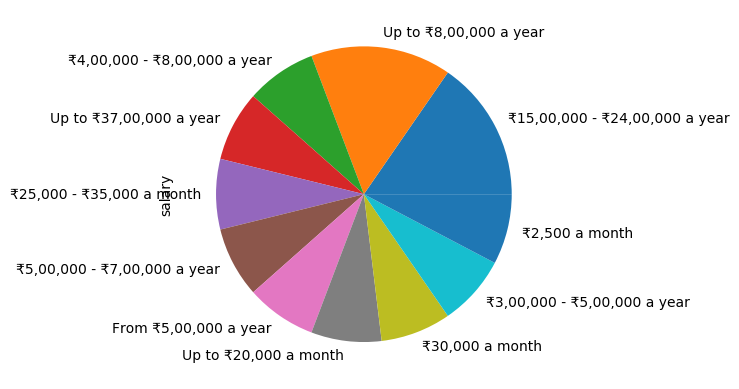

In [8]:
final_salary["salary"].dropna().value_counts().plot(kind="pie")

In [36]:
import re

In [37]:
salary_range = []
for i in final_salary['salary']:
    x = re.findall('[0-9,]+', str(i))
    for j in x:
        salary_range.append(int(j.replace(",",'')))
        salary_range = [i for i in salary_range if i != 0]
        salary_range = sorted(salary_range)

In [38]:
salary_range

[2500,
 20000,
 25000,
 30000,
 35000,
 300000,
 400000,
 500000,
 500000,
 500000,
 700000,
 800000,
 800000,
 800000,
 1500000,
 1500000,
 2400000,
 2400000,
 3700000]

In [40]:
salary_df = pd.DataFrame(salary_range, columns=['Salary Range'])

In [41]:
salary_df

,Salary Range
0,2500
1,20000
2,25000
3,30000
4,35000
5,300000
6,400000
7,500000
8,500000
9,500000


In [42]:
sal_count = salary_df['Salary Range'].count()

In [43]:
sal_count

19

In [44]:
st.write(" **SALARY RANGE FROM**", sal_count, "**SALARY VALUES PROVIDED**")

NameError: name 'st' is not defined

In [45]:
salary_df

,Salary Range
0,2500
1,20000
2,25000
3,30000
4,35000
5,300000
6,400000
7,500000
8,500000
9,500000


In [46]:
df.columns

Index(['id', 'company', 'positionName_x', 'description', 'salary', 'location',
       'rating', 'reviewsCount', 'postedAt', 'externalApplyLink', 'url', 'All',
       'JobID', 'positionName_y', 'KNN', 'TF-IDF', 'CV', 'Final'],
      dtype='object')

In [49]:
rating_count = df.rating.count()

In [52]:
rating_count

18

In [54]:
reviews_Count = df.reviewsCount.count()

In [70]:
reviews_Count = df.reviewsCount.count()

In [71]:
reviews_Count

18

In [58]:
reviewsCount = pd.DataFrame(reviews_Count)


In [59]:
reviewsCount

,rating
3.7,7
3.8,3
4.1,3
3.6,2
2.8,1
4.0,1
4.7,1


In [ ]:
reviewsCount.reset_index(inplace=True)


In [64]:
reviewsCount

,level_0,index,rating
0,0,3.7,7
1,1,3.8,3
2,2,4.1,3
3,3,3.6,2
4,4,2.8,1
5,5,4.0,1
6,6,4.7,1


In [65]:
reviewsCount.rename({'index': 'Reviews', 'reviewsCount': 'Count'}, axis=1, inplace=True)

In [66]:
reviewsCount

,level_0,Reviews,rating
0,0,3.7,7
1,1,3.8,3
2,2,4.1,3
3,3,3.6,2
4,4,2.8,1
5,5,4.0,1
6,6,4.7,1


In [73]:
reviews_Count = df3.reviewsCount.count()

In [74]:
reviews_Count

18

In [75]:
count_with_null = df3.reviewsCount.count() + df3.reviewsCount.isnull().sum()

In [76]:
count_with_null

56

In [77]:
reviews_Count = df3.reviewsCount.value_counts()

In [78]:
reviews_Count

2888.0     2
1045.0     2
11645.0    2
266.0      2
927.0      2
49.0       2
6.0        1
66.0       1
9087.0     1
26.0       1
35.0       1
265.0      1
Name: reviewsCount, dtype: int64

In [79]:
reviewsCount = pd.DataFrame(reviews_Count)
reviewsCount

,reviewsCount
2888.0,2
1045.0,2
11645.0,2
266.0,2
927.0,2
49.0,2
6.0,1
66.0,1
9087.0,1
26.0,1


In [80]:
reviewsCount.reset_index(inplace=True)
reviewsCount

,index,reviewsCount
0,2888.0,2
1,1045.0,2
2,11645.0,2
3,266.0,2
4,927.0,2
5,49.0,2
6,6.0,1
7,66.0,1
8,9087.0,1
9,26.0,1


In [83]:
reviewsCount.rename({'index': 'No_Of_Reviews', 'reviewsCount': 'Count'}, axis=1, inplace=True)


In [84]:
reviewsCount

,No_Of_Reviews,Count
0,2888.0,2
1,1045.0,2
2,11645.0,2
3,266.0,2
4,927.0,2
5,49.0,2
6,6.0,1
7,66.0,1
8,9087.0,1
9,26.0,1


In [85]:
df

,id,company,positionName_x,description,salary,location,rating,reviewsCount,postedAt,externalApplyLink,url,All,JobID,positionName_y,KNN,TF-IDF,CV,Final
0,1336f2ba99b7aa51,Emerson,Data Science Engineer,Responsibilities Development of Data Analys...,NaN,"Pune, Maharashtra",3.8,2888.0,2 days ago,https://in.indeed.com/applystart?jk=1336f2ba99...,https://www.indeed.co.in/rc/clk?jk=1336f2ba99b...,"1336f2ba99b7aa51,Emerson,Data Science Engineer...",33,Data Science Engineer,0.037676,0.038526,0.081524,0.157726
1,d6a9445dca6529ca,Revolo InfoTech,Machine Learning Engineer,We are seeking a highly skilled ML Ops Enginee...,"₹15,00,000 - ₹24,00,000 a year","Mumbai, Maharashtra",NaN,NaN,2 days ago,NaN,https://www.indeed.co.in/company/Revolo-Infote...,"d6a9445dca6529ca,Revolo InfoTech,Machine Learn...",54,Machine Learning Engineer,0.214047,0.215996,0.120360,0.550404
2,8099c00f755726f3,Token Metrics,Data Scientist (India Remote),Token Metrics is searching for a highly capabl...,NaN,"Bengaluru, Karnataka",NaN,NaN,1 day ago,NaN,https://www.indeed.co.in/rc/clk?jk=8099c00f755...,"8099c00f755726f3,Token Metrics,Data Scientist ...",74,Data Scientist (India Remote),0.133341,0.135376,0.320617,0.589334
3,23291deee438b2dc,Analog and Digital Labs India Pvt,Machine Learning Developer,Greetings From Analog & Digital Labs India Pvt...,"₹3,00,000 - ₹5,00,000 a year","Coimbatore, Tamil Nadu",NaN,NaN,3 days ago,NaN,https://www.indeed.co.in/company/Analog-and-Di...,"23291deee438b2dc,Analog and Digital Labs India...",78,Machine Learning Developer,0.029908,0.030601,0.062694,0.123203
4,a388c042d99345d2,Chubb INA Holdings Inc.,Data Scientist,Job Requirements Responsibilities Work with b...,NaN,"Bengaluru, Karnataka",3.7,1045.0,4 days ago,https://in.indeed.com/applystart?jk=a388c042d9...,https://www.indeed.co.in/rc/clk?jk=a388c042d99...,"a388c042d99345d2,Chubb INA Holdings Inc.,Data ...",91,Data Scientist,0.333333,0.333333,0.183206,0.849873
5,5f449b74d67e072d,Chubb INA Holdings Inc.,Data Science - Knowledge Graph,Work Experience Work with business partners gl...,NaN,"Bengaluru, Karnataka",3.7,1045.0,4 days ago,https://in.indeed.com/applystart?jk=5f449b74d6...,https://www.indeed.co.in/rc/clk?jk=5f449b74d67...,"5f449b74d67e072d,Chubb INA Holdings Inc.,Data ...",95,Data Science - Knowledge Graph,0.324164,0.324391,0.177472,0.826027
6,7abc93fb606577de,Pridetech labs pvt ltd Bangalore,Data Scientist,Qualifications for Senior Data Scientist MS in...,"From ₹5,00,000 a year",Remote,NaN,NaN,5 days ago,NaN,https://www.indeed.co.in/company/Pridetech-lab...,"7abc93fb606577de,Pridetech labs pvt ltd Bangal...",140,Data Scientist,0.067500,0.068870,0.118448,0.254817
7,0411db7f75aa4a13,Payas Technologies Pvt Ltd,Python Data Science Trainer,We are hiring for an expert Python Data Scienc...,"₹30,000 a month","Pune, Maharashtra",NaN,NaN,5 days ago,NaN,https://www.indeed.co.in/company/Payas-Technol...,"0411db7f75aa4a13,Payas Technologies Pvt Ltd,Py...",164,Python Data Science Trainer,0.130479,0.132499,0.110678,0.373656
8,c12e50690eed7838,Simplifai India,Senior Data Scientist,Simplifai is a Global IT company specializing ...,NaN,"Pune, Maharashtra",NaN,NaN,10 days ago,https://in.indeed.com/applystart?jk=c12e50690e...,https://www.indeed.co.in/rc/clk?jk=c12e50690ee...,"c12e50690eed7838,Simplifai India,Senior Data S...",183,Senior Data Scientist,0.191957,0.194028,0.157269,0.543254
9,464f8855716a27dc,CogniveAI Innovations,Machine Learning Engineer,No. of. Openings : 4 Years of Experience : ...,NaN,"Chennai, Tamil Nadu",NaN,NaN,11 days ago,https://in.indeed.com/applystart?jk=464f885571...,https://www.indeed.co.in/rc/clk?jk=464f8855716...,"464f8855716a27dc,CogniveAI Innovations,Machine...",199,Machine Learning Engineer,0.027520,0.028162,0.018370,0.074052


In [86]:
df.columns

Index(['id', 'company', 'positionName_x', 'description', 'salary', 'location',
       'rating', 'reviewsCount', 'postedAt', 'externalApplyLink', 'url', 'All',
       'JobID', 'positionName_y', 'KNN', 'TF-IDF', 'CV', 'Final'],
      dtype='object')

In [88]:
df=pd.read_csv("preprocessed_jobs.csv")

In [97]:
all_locations=list(df["location"].dropna().unique())

In [100]:
all_locations=pd.DataFrame(all_locations,columns=["location"])

In [102]:
all_locations.to_csv("all_locations.csv",index=False)

In [ ]:
######################################3